# Import packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

# Import data

In [2]:
# Import data from URL and add column names

import ssl
ssl._create_default_https_context = ssl._create_unverified_context
auto_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data', header = None
                     , na_values = '?')

auto_df.columns = [
 'symboling'
 ,'normalized-losses'
 ,'make'
 ,'fuel-type'
 ,'aspiration'
 ,'num-of-doors'
 ,'body-style'
 ,'drive-wheels'
 ,'engine-location'
 ,'wheel-base'
 ,'length'
 ,'width'
 ,'height'
 ,'curb-weight'
 ,'engine-type'
 ,'num-of-cylinders'
 ,'engine-size'
 ,'fuel-system'
 ,'bore'
 ,'stroke'
 ,'compression-ratio'
 ,'horsepower'
 ,'peak-rpm'
 ,'city-mpg'
 ,'highway-mpg'
 , 'price'
]

In [3]:
auto_df.tail()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0
204,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,19,25,22625.0


# Data imputation

In [4]:
# Impute values for columns with NAs
auto_df['normalized-losses'].fillna(auto_df['normalized-losses'].median(), inplace=True)
auto_df['num-of-doors'].fillna(auto_df['num-of-doors'].mode(), inplace=True)
auto_df['fuel-type'].fillna(auto_df['fuel-type'].mode(), inplace=True)
auto_df['num-of-cylinders'].fillna(auto_df['num-of-cylinders'].mode(), inplace=True)
auto_df['bore'].fillna(auto_df['bore'].median(), inplace=True)
auto_df['stroke'].fillna(auto_df['stroke'].median(), inplace=True)
auto_df['horsepower'].fillna(auto_df['horsepower'].median(), inplace=True)
auto_df['peak-rpm'].fillna(auto_df['peak-rpm'].median(), inplace=True)
auto_df['price'].fillna(auto_df['price'].median(), inplace=True)

# Data exploration

C:\Users\Usuario\AppData\Local\Temp\ipykernel_12828\1507141834.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = auto_df.corr()


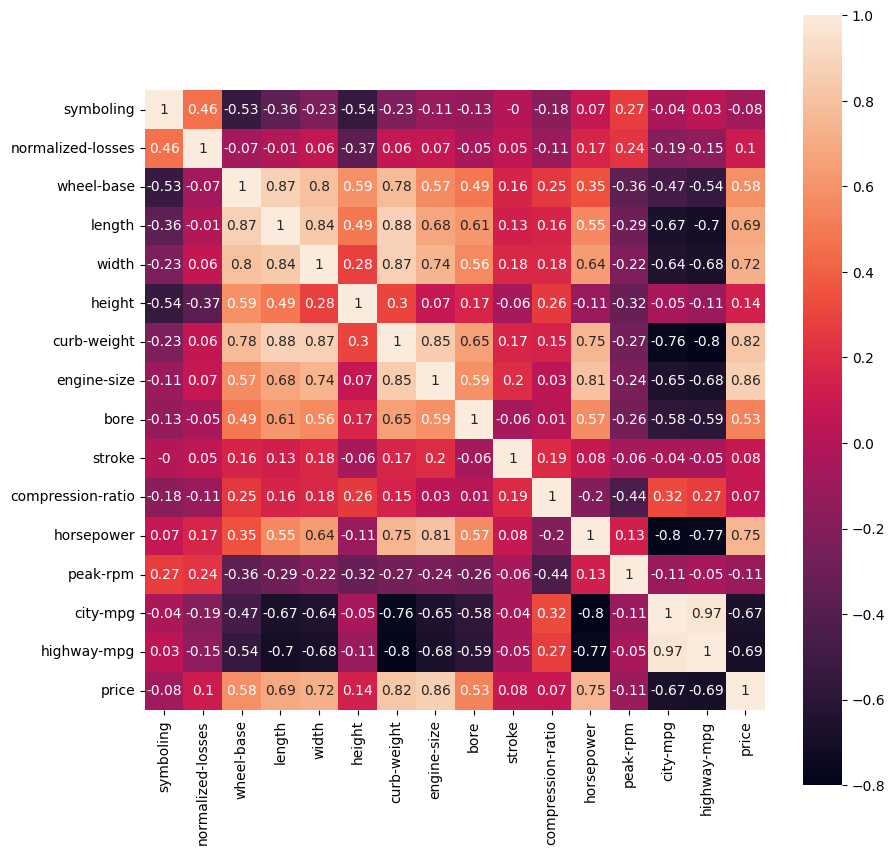

In [5]:
# Calculate correlations between the variables. What do the black squares represent?
corr = auto_df.corr()
 
# Heatmap
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
sns.heatmap(round(corr,2), annot=True, square=True);

# Modeling preparation

In [6]:
# Isolate response variable
y = pd.DataFrame(auto_df['price'])

In [7]:
# Drop response variable from feature dataframe
X = auto_df.drop('price', axis=1)

In [8]:
# Choose a subset of variables to work with
# X  = X[['fuel-type', 'wheel-base', 'peak-rpm', 'city-mpg']]
# X = X[['num-of-cylinders','fuel-type','peak-rpm', 'city-mpg']]
X  = X[['fuel-type','peak-rpm', 'city-mpg']]

In [9]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
# Reset each index, so we'll be able to concatenate them with our encoded variables dataframe
X_train.reset_index(inplace=True)
X_test.reset_index(inplace=True)
y_train.reset_index(inplace=True)
y_test.reset_index(inplace=True)

In [11]:
# Take a look at the df before transformation
X_train.head()

,index,fuel-type,peak-rpm,city-mpg
0,177,gas,4200.0,27
1,75,gas,5000.0,19
2,174,diesel,4500.0,30
3,31,gas,6000.0,31
4,12,gas,4250.0,21


In [12]:
# See levels of fuel-type
X_train['fuel-type'].value_counts()

gas       131
diesel     12
Name: fuel-type, dtype: int64

In [13]:
# Source: http://www.insightsbot.com/blog/McTKK/python-one-hot-encoding-with-scikit-learn
# Get dummies from fuel-type
from sklearn.preprocessing import LabelBinarizer
fuel_type_lb = LabelBinarizer()

# Train
fuel_type_dummies_df = fuel_type_lb.fit_transform(X_train['fuel-type'].values)

# Test
fuel_type_dummies_test_df = fuel_type_lb.fit_transform(X_test['fuel-type'].values)

In [14]:
# Add everything back to your main df
# Train
fuel_type_dummies_df = pd.DataFrame(fuel_type_dummies_df, columns = ["FuelType_"+str(int(i)) for i in range(fuel_type_dummies_df.shape[1])])
X_train_final = pd.concat([X_train, fuel_type_dummies_df], axis=1)

#Test
fuel_type_dummies_test_df = pd.DataFrame(fuel_type_dummies_test_df, columns = ["FuelType_"+str(int(i)) for i in range(fuel_type_dummies_test_df.shape[1])])
X_test_final = pd.concat([X_test, fuel_type_dummies_test_df], axis=1)

In [15]:
# Take a look after transformation
X_train_final.head()

,index,fuel-type,peak-rpm,city-mpg,FuelType_0
0,177,gas,4200.0,27,1
1,75,gas,5000.0,19,1
2,174,diesel,4500.0,30,0
3,31,gas,6000.0,31,1
4,12,gas,4250.0,21,1


In [16]:
# Drop redundant columns and index
# Train
X_train_final.drop('index', axis=1, inplace=True)
X_train_final.drop('fuel-type', axis=1, inplace=True)
y_train.drop('index', axis=1, inplace=True)

# Test
X_test_final.drop('index', axis=1, inplace=True)
X_test_final.drop('fuel-type', axis=1, inplace=True)
y_test.drop('index', axis=1, inplace=True)

In [17]:
# Last check that everything looks right
X_train_final.head()

,peak-rpm,city-mpg,FuelType_0
0,4200.0,27,1
1,5000.0,19,1
2,4500.0,30,0
3,6000.0,31,1
4,4250.0,21,1


# Linear regression with lasso - sklearn

In [18]:
# Our baseline linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train_final, y_train)
lr_pred = lr_model.predict(X_test_final)
print(lr_model.score(X_test_final, y_test))
lr_model.coef_

0.37730473581775914


array([[-1.16435206e+00, -1.02868136e+03, -6.59799909e+03]])

In [19]:
# Lasso regression model with no penalty (OLS)
lasso_model_0 = Lasso(alpha=0, fit_intercept=True)
lasso_model_0.fit(X_train_final, y_train)
print(lasso_model_0.score(X_test_final, y_test))
lasso_model_0.coef_

0.37730473581777224


C:\Users\Usuario\AppData\Local\Temp\ipykernel_12828\4113012781.py:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso_model_0.fit(X_train_final, y_train)
c:\Users\Usuario\miniforge3\envs\mlm\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\Usuario\miniforge3\envs\mlm\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.694e+09, tolerance: 8.389e+05 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model 

array([-1.16435206e+00, -1.02868136e+03, -6.59799909e+03])

In [20]:
# Lasso regression model with alpha = 10 (some penalty)
lasso_model_10 = Lasso(alpha=10, fit_intercept=True)
lasso_model_10.fit(X_train_final, y_train)
print(lasso_model_10.score(X_test_final, y_test))
lasso_model_10.coef_

0.3768868275194177


array([-1.20857504e+00, -1.02633803e+03, -6.41956494e+03])

In [21]:
# Lasso regression model with alpha = 10000 (high penalty)
lasso_model_10k = Lasso(alpha=10000, fit_intercept=True)
lasso_model_10k.fit(X_train_final, y_train)
lasso_10k_pred = lasso_model_10k.predict(X_test_final)
print(lasso_model_10k.score(X_test_final, y_test))
lasso_model_10k.coef_

0.3776576977155204


array([  -2.55757145, -663.8062391 ,   -0.        ])

In [22]:
lm_combined = pd.concat([X_test_final['city-mpg'], pd.Series(lr_pred.ravel())], axis=1)

In [23]:
lm_combined.columns = ['city-mpg', 'pred']

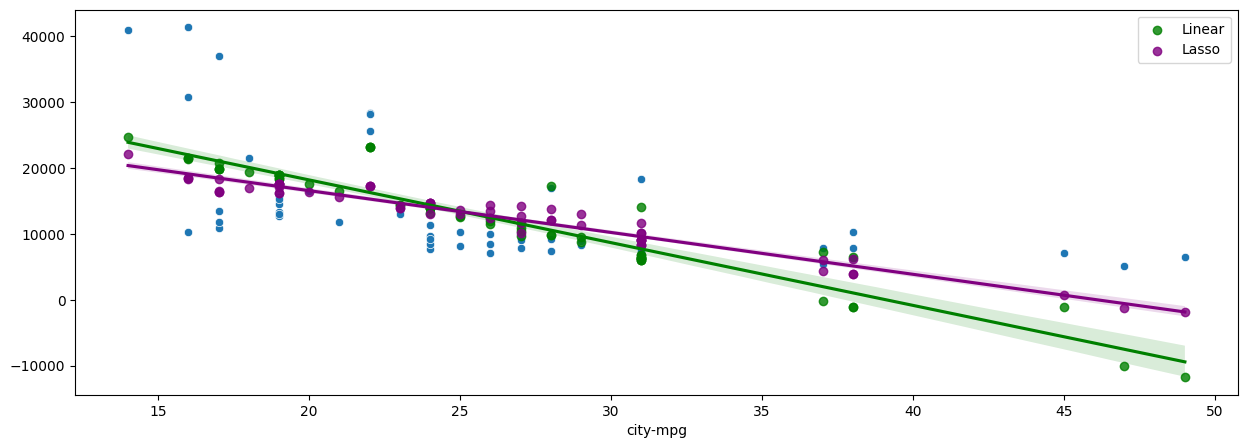

In [28]:
# Plot to compare models
fig,ax = plt.subplots(1,1,figsize=(15,5))
sns.scatterplot(x = X_test_final['city-mpg'], y = y_test.values.ravel())
sns.regplot(x = X_test_final['city-mpg'], y = lr_pred.ravel(), color='g',label='Linear')
sns.regplot(x = X_test_final['city-mpg'], y = lasso_10k_pred.ravel(), color='purple',label='Lasso')
plt.legend();

# Ridge regression - sklearn

In [29]:
# Ridge regression with high penalty
ridge_model = Ridge(alpha=10000, fit_intercept=True)
ridge_model.fit(X_train_final, y_train)

ridge_pred = ridge_model.predict(X_test_final)
print(ridge_model.score(X_test_final, y_test))
ridge_model.coef_

0.2724781493540728


array([[  -2.34885698, -315.559277  ,   -1.71853767]])

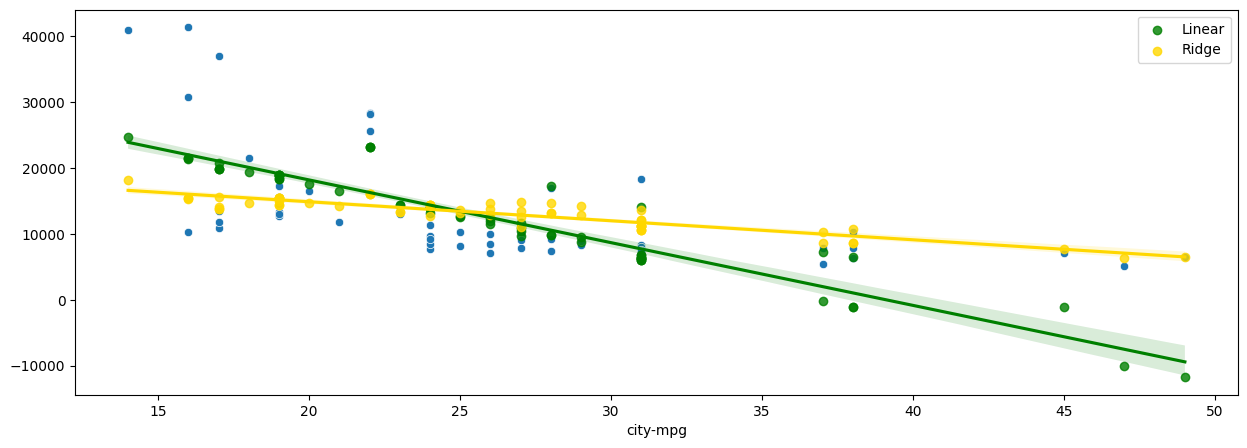

In [30]:
# Plot to compare models
fig,ax = plt.subplots(1,1,figsize=(15,5))
sns.scatterplot(x = X_test_final['city-mpg'], y = y_test.values.ravel())
sns.regplot(x = X_test_final['city-mpg'], y = lr_pred.ravel(), color='g',label='Linear')
sns.regplot(x = X_test_final['city-mpg'], y = ridge_pred.ravel(), color='gold',label='Ridge')
plt.legend();

# Lasso polynomial regression - sklearn

In [31]:
# Create polynomial regression features of nth degree
poly_reg = PolynomialFeatures(degree = 2)
X_poly_train = poly_reg.fit_transform(pd.DataFrame(X_train_final))
X_poly_test = poly_reg.fit_transform(pd.DataFrame(X_test_final))

# poly_result = poly_reg.fit(X_train_final, y_train)

# Fit linear model now polynomial features
poly_model = LinearRegression()
poly_result = poly_model.fit(X_poly_train, y_train)
y_poly_pred = poly_model.predict(X_poly_test)

In [32]:
# Lasso regression model with alpha = 10000 (high penalty) -- now with a lot of new variables
lasso_poly_model_10k = Lasso(alpha=10000, fit_intercept=True)
lasso_poly_model_10k.fit(X_poly_train, y_train)
lasso_poly_10k_pred = lasso_poly_model_10k.predict(X_poly_test)
print(lasso_poly_model_10k.score(X_poly_test, y_test))
lasso_poly_model_10k.coef_

0.4956892416843769


c:\Users\Usuario\miniforge3\envs\mlm\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.064e+06, tolerance: 8.389e+05
  model = cd_fast.enet_coordinate_descent(


array([ 0.00000000e+00, -4.59613355e+00, -0.00000000e+00,  0.00000000e+00,
        1.58553230e-03, -5.14854254e-01, -7.35577088e-01,  3.27899268e+01,
        0.00000000e+00,  0.00000000e+00])

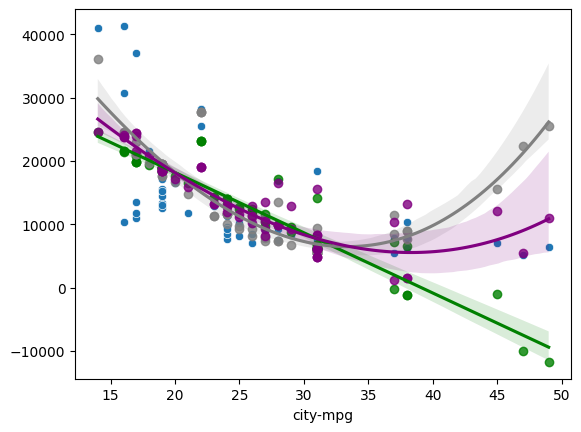

In [33]:
# Plot to compare models
sns.scatterplot(x = X_test_final['city-mpg'], y = y_test.values.ravel())
sns.regplot(x = X_test_final['city-mpg'], y = lr_pred.ravel(), color='g')
sns.regplot(x = X_test_final['city-mpg'], y = y_poly_pred.ravel(), color='gray', order=3)
sns.regplot(x = X_test_final['city-mpg'], y = lasso_poly_10k_pred.ravel(), color='purple', order=3);

# Appendix: handling many levels of categorical variables

In [30]:
# See that this is a multi-class categorical variable
X = auto_df.drop('price', axis=1)

In [31]:
X_train = X.copy()
X_train['num-of-cylinders'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: num-of-cylinders, dtype: int64

In [32]:
X = auto_df.drop('price', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
# Take a subset of columns
X_train_pred = X_train[['fuel-type', 'wheel-base', 'peak-rpm', 'city-mpg', 'num-of-cylinders']]

In [34]:
# Source: http://www.insightsbot.com/blog/McTKK/python-one-hot-encoding-with-scikit-learn
# Create dummy variables 
from sklearn.preprocessing import LabelBinarizer
fuel_type_lb = LabelBinarizer()
num_cyl_mlb = LabelBinarizer()
X = fuel_type_lb.fit_transform(X_train_pred['fuel-type'].values)
X2 = num_cyl_mlb.fit_transform(X_train_pred['num-of-cylinders'].values) 

In [35]:
# Determine variable order and rename
col_levels = ['eight', 'five', 'four', 'six', 'twelve', 'two']

In [36]:
# Naming columns to make sense
dfOneHot = pd.DataFrame(X, columns = ["FuelType_"+str(int(i)) for i in range(X.shape[1])])
dfOneHot2 = pd.DataFrame(X2, columns = ["NumCyl_"+str(col_levels[i]) for i in range(X2.shape[1])])
df = pd.concat([X_train_pred, dfOneHot, dfOneHot2], axis=1)

In [37]:
# Drop unecessary columns
# df.drop('index', axis=1, inplace=True)
df.drop('fuel-type', axis=1, inplace=True)
df.drop('num-of-cylinders', axis=1, inplace=True)

In [38]:
df.head()

,wheel-base,peak-rpm,city-mpg,FuelType_0,NumCyl_eight,NumCyl_five,NumCyl_four,NumCyl_six,NumCyl_twelve,NumCyl_two
177,102.4,4200.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,102.7,5000.0,19.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
174,102.4,4500.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,86.6,6000.0,31.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
12,101.2,4250.0,21.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


# Appendix: alternate categorical variable encoding - one-hot encoding

In [39]:
# Take a subset of columns
X_train_pred = X_train[['fuel-type', 'wheel-base', 'peak-rpm', 'city-mpg', 'num-of-cylinders']]

In [40]:
# Encode categorical variables to numerical levels
from sklearn.preprocessing import LabelEncoder
le_fuel_type = LabelEncoder()
X_train_pred['fuel-type'] = le_fuel_type.fit_transform(X_train_pred['fuel-type'])

/var/folders/s5/fm0sc7qd6n9dm_v2ysffvs5s4nth35/T/ipykernel_88504/4139795092.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_pred['fuel-type'] = le_fuel_type.fit_transform(X_train_pred['fuel-type'])


In [41]:
# Get dummies from numerical levels
from sklearn.preprocessing import OneHotEncoder
fuel_type_ohe = OneHotEncoder()
X = fuel_type_ohe.fit_transform(X_train_pred['fuel-type'].values.reshape(-1,1)).toarray()

In [42]:
# Reset the training df index
X_train_pred.reset_index(inplace=True)

In [43]:
# Join the one hot encoded dataframe back to your other dataframe
dfOneHot = pd.DataFrame(X, columns = ["FuelType_"+str(int(i)) for i in range(X.shape[1])])
df = pd.concat([X_train_pred, dfOneHot], axis=1)

In [44]:
# Take a look
df.head()

,index,fuel-type,wheel-base,peak-rpm,city-mpg,num-of-cylinders,FuelType_0,FuelType_1
0,177,1,102.4,4200.0,27,four,0.0,1.0
1,75,1,102.7,5000.0,19,four,0.0,1.0
2,174,0,102.4,4500.0,30,four,1.0,0.0
3,31,1,86.6,6000.0,31,four,0.0,1.0
4,12,1,101.2,4250.0,21,six,0.0,1.0


In [45]:
# Drop unecessary columns
df.drop('index', axis=1, inplace=True)
df.drop('fuel-type', axis=1, inplace=True)
df.drop('num-of-cylinders', axis=1, inplace=True)